In [ ]:
import pandas as pd
import numpy as np

### Биномиальное распределение

Посмотрим на тот же эксперимент, но проанализируем метрику `retention_n` — показатель, продолжал ли пользователь играть в игру на n-й день после скачивания.

In [2]:
data = pd.read_csv("../data/cookie_cats.csv")
data = data.drop(columns=['userid', 'sum_gamerounds'])
data

,version,retention_1,retention_7
0,gate_30,False,False
1,gate_30,True,False
2,gate_40,True,False
3,gate_40,False,False
4,gate_40,True,True
...,...,...,...
90184,gate_40,True,False
90185,gate_40,False,False
90186,gate_30,True,False
90187,gate_40,True,False


Для данных с распределением Бернулли используется z-критерий пропорций. Выполняется ли критерий для `retention_1`?

In [8]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
A = data[data.version == 'gate_30'].retention_1
B = data[data.version == 'gate_40'].retention_1
proportions_ztest([A.sum(), B.sum()],
                  [len(A), len(B)])[1]

0.07440965529691913

На самом деле для анализа изменений на 30-40 уровнях ждать один день недостаточно. Повторите процедуру с метрикой `retention_7`. Изменился ли результат?

In [6]:
alpha = 0.05
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
A = data[data.version == 'gate_30'].retention_7
B = data[data.version == 'gate_40'].retention_7
proportions_ztest([A.sum(), B.sum()],
                  [len(A), len(B)])[1]

0.001554249975614329

Сделайте вывод о значимости изменения retention и результате эксперимента:

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

### Другие распределения

In [31]:
from scipy import stats

A = np.concatenate((stats.norm(loc=2, scale=2).rvs(size=900), stats.norm(loc=12, scale=2).rvs(size=900)))
B = np.concatenate((stats.norm(loc=1, scale=3).rvs(size=600),
                    stats.norm(loc=7, scale=1).rvs(size=600),
                    stats.norm(loc=13, scale=1).rvs(size=600)))

Посмотрите на графики плотностей этих синтетических распределений.

<Axes: ylabel='Density'>

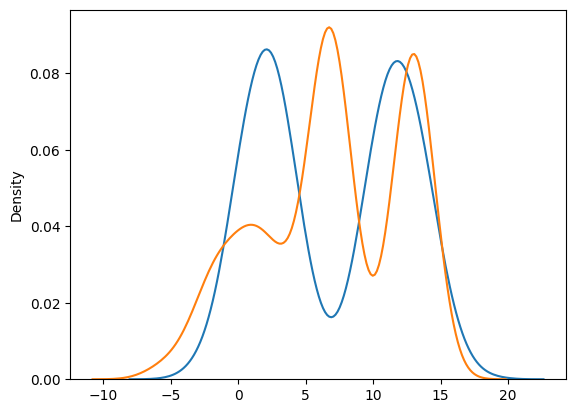

In [32]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import seaborn as sns

sns.kdeplot(A)
sns.kdeplot(B)

Если данные не удовлетворяют условиям, необходимым для применения параметрических стат.критериев, можно использовать непараметрический тест Манна-Уитни. Найдите с его помощью p-value для данных A и B:

In [33]:
from scipy.stats import mannwhitneyu

alpha = 0.05
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mannwhitneyu(A, B)

MannwhitneyuResult(statistic=1591431.0, pvalue=0.3595579034204869)

### Продолжительность наблюдений, мощность

Возьмём один из экспериментов [датасета платформы ASOS.com](https://osf.io/64jsb/)

In [5]:
data = pd.read_csv("../data/asos_digital_experiments_dataset.csv")
data = data[data.experiment_id == '036afc']
data

,experiment_id,variant_id,metric_id,time_since_start,count_c,count_t,mean_c,mean_t,variance_c,variance_t
0,036afc,2,1,1.5,188065.0,186686.0,0.107808,0.107828,0.096186,0.096201
1,036afc,2,1,2.0,245041.0,243694.0,0.131790,0.131435,0.114422,0.114160
2,036afc,2,1,2.5,277237.0,275949.0,0.143065,0.142711,0.122598,0.122345
3,036afc,2,1,3.0,315689.0,314676.0,0.161789,0.160997,0.135613,0.135077
4,036afc,2,1,3.5,338631.0,337715.0,0.172474,0.171067,0.142727,0.141803
...,...,...,...,...,...,...,...,...,...,...
523,036afc,2,4,74.5,1040896.0,1040212.0,146.911169,146.750234,76511.749251,76509.544866
524,036afc,2,4,75.0,1044740.0,1044065.0,147.328828,147.119653,77121.192206,77071.197961
525,036afc,2,4,75.5,1046104.0,1045507.0,147.477715,147.234885,77220.485837,77173.139114
526,036afc,2,4,76.0,1049510.0,1048990.0,147.944232,147.690193,77707.794363,77711.375918


Для t-теста с двусторонней альтернативой добавьте три колонки:
* Уровень мощности при фиксированном уровне значимости и размере эффекта (`effect_size`)
* Настоящий эффект эксперимента (разность метрики строго в порядке `тест - контроль`, поэтому эффект имеет направление и знак)
* Уровень мощности при фиксированном уровне значимости и реальном эффекте

In [10]:
from statsmodels.stats import power

alpha = 0.05
effect_size = 0.005
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data['power_fixed_effect'] = data.apply(lambda x: power.TTestIndPower().solve_power(effect_size=effect_size,
                                                                                    alpha=alpha,
                                                                                    nobs1=x.count_c,
                                                                                    ratio=x.count_t / x.count_c,
                                                                                    alternative='two-sided'), axis=1)
data['effect'] = data['mean_t'] - data['mean_c']
data['power_calc_effect'] = data.apply(lambda x: power.TTestIndPower().solve_power(effect_size=x.effect,
                                                                                   alpha=alpha,
                                                                                   nobs1=x.count_c,
                                                                                   ratio=x.count_t / x.count_c,
                                                                                   alternative='two-sided'), axis=1)
data

,experiment_id,variant_id,metric_id,time_since_start,count_c,count_t,mean_c,mean_t,variance_c,variance_t,power,power_fixed_effect,effect,power_calc_effect
0,036afc,2,1,1.5,188065.0,186686.0,0.107808,0.107828,0.096186,0.096201,0.334001,0.334001,0.000020,0.050004
1,036afc,2,1,2.0,245041.0,243694.0,0.131790,0.131435,0.114422,0.114160,0.416067,0.416067,-0.000355,0.051764
2,036afc,2,1,2.5,277237.0,275949.0,0.143065,0.142711,0.122598,0.122345,0.460017,0.460017,-0.000354,0.051989
3,036afc,2,1,3.0,315689.0,314676.0,0.161789,0.160997,0.135613,0.135077,0.509980,0.509980,-0.000792,0.061389
4,036afc,2,1,3.5,338631.0,337715.0,0.172474,0.171067,0.142727,0.141803,0.538284,0.538284,-0.001407,0.089118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,036afc,2,4,74.5,1040896.0,1040212.0,146.911169,146.750234,76511.749251,76509.544866,0.950174,0.950174,-0.160935,1.000000
524,036afc,2,4,75.0,1044740.0,1044065.0,147.328828,147.119653,77121.192206,77071.197961,0.950856,0.950856,-0.209176,1.000000
525,036afc,2,4,75.5,1046104.0,1045507.0,147.477715,147.234885,77220.485837,77173.139114,0.951102,0.951102,-0.242830,1.000000
526,036afc,2,4,76.0,1049510.0,1048990.0,147.944232,147.690193,77707.794363,77711.375918,0.951702,0.951702,-0.254039,1.000000


Для случая фиксированного остройте график зависимости уровня мощности от количества экспериментов (можете взять count_c), чтобы посмотреть на зависимость мощности от размера выборки.

<Axes: xlabel='count_c', ylabel='power_fixed_effect'>

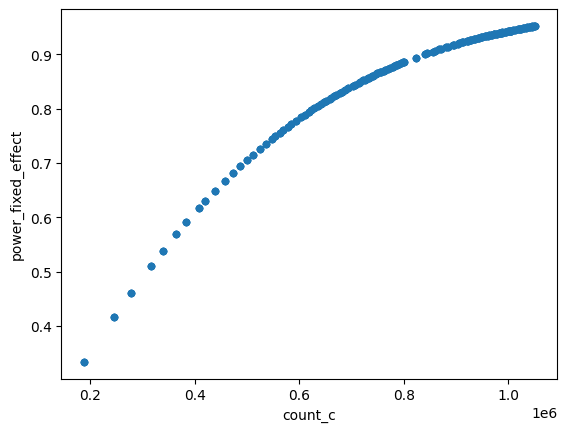

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data.plot(kind='scatter', x='count_c', y='power_fixed_effect')